# Import libraries

In [1]:
%matplotlib notebook
# from IPython.display import clear_output
import time  
import gym
import numpy as np 
import matplotlib.pyplot as plt

# Define a registered env

In [2]:
from gym.envs.registration import register

try:
    register(
        id='FrozenLakeNotSlippery-v0',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name' : '4x4', 'is_slippery': False},
        max_episode_steps=100,
        reward_threshold=.8196, # optimum = .8196
    )
except:
    print('Already registered.')
    
env = gym.make('FrozenLakeNotSlippery-v0')
env.reset()

0

In [3]:
env = gym.make('FrozenLakeNotSlippery-v0')
env.reset()

0

# Train RL agent


In [4]:
action_cols = env.action_space.n
state_rows = env.observation_space.n
q_table = np.zeros([state_rows ,action_cols])

In [5]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
alpha = 0.8 # learning rate
gamma = 0.95 # discount rate
epsilon = 1
max_epsilon =1
min_epsilon = 0.01
decay_rate = 0.001

In [7]:
def choose_action(epsilon , q_table , state):
    
    random_num = np.random.random()
    #exploitation:
    if random_num > epsilon:
        state_row = q_table[state , :]
        action = np.argmax(state_row)
    
    #exploration
    else:
        action = env.action_space.sample()
        
    return action


In [8]:
def q_value(old_q_value , next_q_value , reward):
    
    return old_q_value + alpha * (reward + gamma * next_q_value - old_q_value) 

In [9]:
def reduce_epsilon(epoch):
    
    # using exponential to decrease
    return min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * epoch)

In [10]:
Epochs = 20000 # number of times agent play the game
rewards = []
epsilon_y_plot = []
log_interval = 100
count = 1

for episode in range(Epochs):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
    
        # action
        action = choose_action(epsilon , q_table , state)

        # state,reward,done,info
        new_state,reward,done,info = env.step(action)

        #current q_value
        old_q_value = q_table[state,action]

        # compute next q_value
        next_q_value = np.max(q_table[new_state , :])

        # update q_value
        ann = q_value(old_q_value , next_q_value , reward)
        q_table[state,action] = ann
        state = new_state
        
        # track reward
        total_reward = total_reward + reward
        
    episode +=1
    epsilon = reduce_epsilon(episode)
    rewards.append(total_reward)
    epsilon_y_plot.append(epsilon)

    if episode % log_interval == 0:    
        print("total reward in #:" ,count,'\t', np.sum(rewards))
        count += 1
    

env.close()


total reward in #: 1 	 0.0
total reward in #: 2 	 1.0
total reward in #: 3 	 5.0
total reward in #: 4 	 17.0
total reward in #: 5 	 48.0
total reward in #: 6 	 79.0
total reward in #: 7 	 114.0
total reward in #: 8 	 159.0
total reward in #: 9 	 211.0
total reward in #: 10 	 262.0
total reward in #: 11 	 323.0
total reward in #: 12 	 392.0
total reward in #: 13 	 452.0
total reward in #: 14 	 521.0
total reward in #: 15 	 589.0
total reward in #: 16 	 661.0
total reward in #: 17 	 750.0
total reward in #: 18 	 832.0
total reward in #: 19 	 912.0
total reward in #: 20 	 998.0
total reward in #: 21 	 1083.0
total reward in #: 22 	 1169.0
total reward in #: 23 	 1256.0
total reward in #: 24 	 1347.0
total reward in #: 25 	 1434.0
total reward in #: 26 	 1527.0
total reward in #: 27 	 1619.0
total reward in #: 28 	 1712.0
total reward in #: 29 	 1809.0
total reward in #: 30 	 1903.0
total reward in #: 31 	 1996.0
total reward in #: 32 	 2092.0
total reward in #: 33 	 2188.0
total reward in

<IPython.core.display.Javascript object>


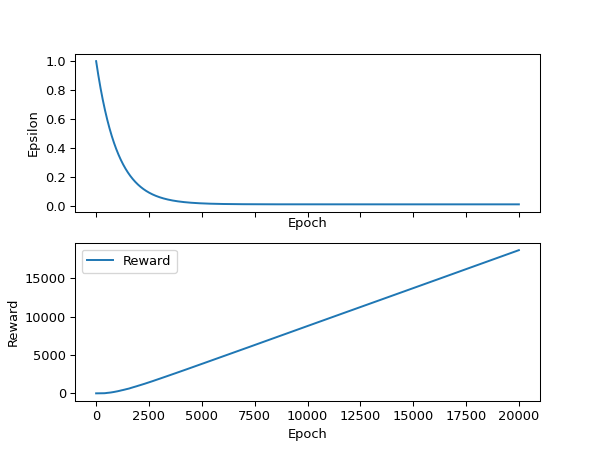

In [11]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(range(Epochs) , epsilon_y_plot, label = 'Epsilon')
ax2.plot(range(Epochs),np.cumsum(rewards) , label = 'Reward')
# Set x and y axes labels
ax1.set(xlabel='Epoch', ylabel='Epsilon')
ax2.set(xlabel='Epoch', ylabel='Reward')
plt.legend()

plt.show()


In [12]:
q_table

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.7448176 , 0.76752509],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

# Using Learned Q Table Results to see RL agent perform

In [13]:
state = env.reset()
rewards = 0
for _ in range(100):
    env.render()
    
    # chose action from the Q-Table
    action = np.argmax(q_table[state]) 
    
    state, reward, done, info = env.step(action) 

    time.sleep(1)
    
    if done:
        break

env.close()